### Exercise 42

My interpretation of this question is to simplfy the expression and expand any values until the final value is a "smaller" calculation. This obviously wont give a straightforward value but can give a shorthanded version of the C formula:
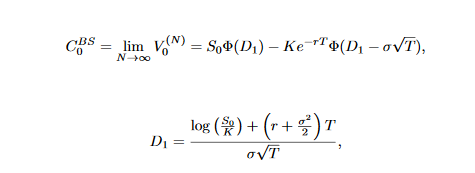


To substitute "K" wouldnt be simplifying from the main formula surely?

### Exercise 43, 
### A basic MC estimator of the BS market model.
The following formula is the expectation of the v0 price of a derivative security using the BS market model:

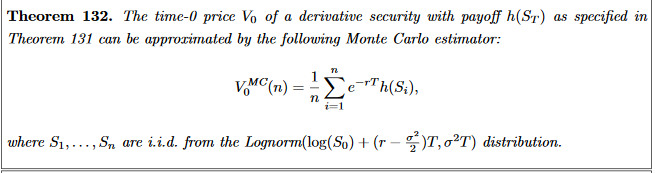

The estimator is given below. **Remember that the lognormal distribution is used with the $S_0$ price,$T$ maturity, and $\sigma$ variance

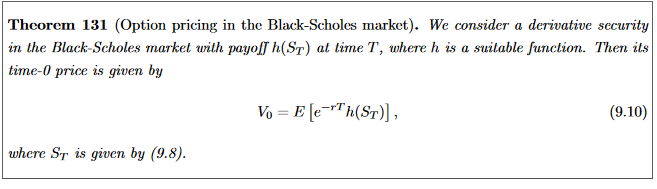

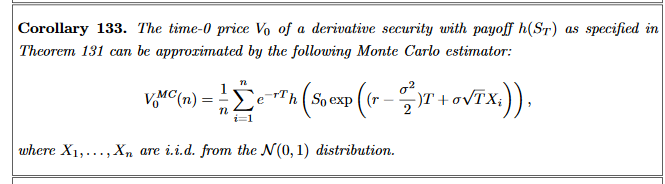

The final image above specifies a much more applicable method using the standard normal distribution. 


Or in the more easily computable Monte carlos estimator that requires the payoff represented by $h$ function above.

Once replaced for the European put option we can just write:

$$h(S_i) = (K - S_i)^{+}\ where\ S_i\ =stockprice\ at \ i$$



$$e^{-rT}*(S_i)$$

### An antithetic variates MC estimator of the BS market model

Note, antiehtic variates are two oppositely correlating random variables. Easily generated by using $X\ and\ (1-X)$ as the random variables.

This means to generate Antithetic estimations we have the formula:

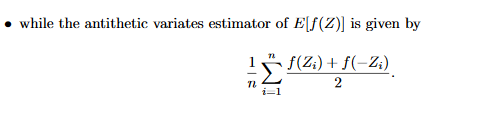

Where each function f(Z) is replaces with the MonteCarlos section above:

$$e^{-rT}h(S_i)$$

Note, S_i is a more complex computation here noted as:

$$S_i = S_0 * exp \Big((r - \frac{\sigma^2}{2})T+\sigma \sqrt{T}X_i\Big) $$

That $X_i$ is a normally distributed value, hence we just input a $(1-X_i)$ value and compute both of these values for respective distributions

Hence we can write the fully fledged formula like so:

$$\frac{1}{n} \sum_{i=1}^{n} \frac{e^{-rT}(S_0 * exp \Big((r - \frac{\sigma^2}{2})T+\sigma \sqrt{T}X_i\Big))+ e^{-rT}(S_0 * exp \Big((r - \frac{\sigma^2}{2})T+\sigma \sqrt{T}(-X_i)\Big))}{2}$$

### A control variates MC estimator of the BS market model

Control variates use a similar distribution that we know the expectation of to compute the error adjustments for the unknow $\mu$ in the other distribution. It uses a simple function to calculate this adjustment that should be made like so:




$$Y_i(b) = Y_i - b(X_i - E[X])$$

Where the Y distribution is the distribution we **don't** have the mean for and the X distribution is the similar distribution **we do** have the mean for.

Hence, we can actually just calculate the value for an ideal b as the running mean we are working out like so:

$$\tilde{b}^*_n = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_j - \bar{X_n)^2}}$$

We can actually plug this into the final formula for the Y function.
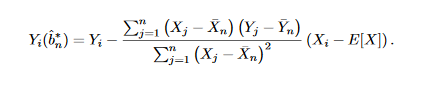

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

### A python implementations of the methods above:


Parameters are as follows:

In [70]:
T = 1 # Maturity time
K = 100 #Strike price
S_0 = 100 #The initial stockprice
sigma=0.2 #The variation in price
r = 0.01 #The interest rate of the riskless asset.
#I think we just calculate this? It is also just a constant that we input into
#The functions.

sample_size = 1_000_000


In [71]:
#First lets construct a simple put payoff calculation we can feed other values into.

def PutPayoff(strikePrice,StockPrice):
    return np.maximum(0,(strikePrice - StockPrice))

In [72]:
#Now we construct a simple analytical evaluation:

def AnalyticalBS(S_0,K,r,T,sigma):
    D1 = np.log(S_0 / K) 
    D1 = D1 + (r + ((sigma**2)/2))*T
    D1 = D1 / (sigma * np.sqrt(T))
    print("D1:{:.6f}".format(D1))
    D2 = D1 - sigma*np.sqrt(T)
    tmp1 = S_0 * norm.cdf(D1,loc=0,scale=1)
    tmp2 = K * np.exp(-r *T) * norm.cdf(D2,loc=0,scale=1)
    price = tmp1 - tmp2
    return price

In [121]:
Abar = AnalyticalBS(S_0,K,r,T,sigma)


D1:0.150000


In [126]:
def MCBS_antithetic(S_0,K,r,T,sigma,sample_size):
    N = np.random.standard_normal(size=sample_size)
    summation = 0
    array1 = []
    for i in N:
        tmp1 = S_0*np.exp((r - (0.5*sigma**2)) * T + (sigma * np.sqrt(T) * i))
        tmp2 = S_0*np.exp((r - (0.5*sigma**2)) * T + (sigma * np.sqrt(T) * (-i)))

        f1 = (np.exp(-r*T)*PutPayoff(K,tmp1))
        f2 = (np.exp(-r*T)*PutPayoff(K,tmp2))
        
        array1.append((f1 + f1)/2)
    return array1
        

In [127]:
def MCBS(S_0,K,r,T,sigma,sample_size):
    N = np.random.standard_normal(size=sample_size)
    summation = 0
    array1 = []
    for i in N:
        tmp1 = S_0*np.exp((r - (0.5*sigma**2)) * T + (sigma * np.sqrt(T) * i))
        array1.append(np.exp(-r*T)*PutPayoff(K,tmp1))
    return array1

In [97]:
MonteCarlos1 = MCBS(S_0,K,r,T,sigma,sample_size);

In [128]:
MonteCarlos1_antithetic = MCBS_antithetic(S_0,K,r,T,sigma,sample_size);

In [129]:
X2 = np.array(MonteCarlos1_antithetic)
Xbar2 = np.cumsum(X2)
Xbar2 = Xbar2 / np.arange(1,sample_size+1)

In [99]:
X = np.array(MonteCarlos1)
Xbar = np.cumsum(X)
Xbar = Xbar / np.arange(1,sample_size+1)

Text(0.5, 1.0, 'MonteCarlos methods with strike price 100')

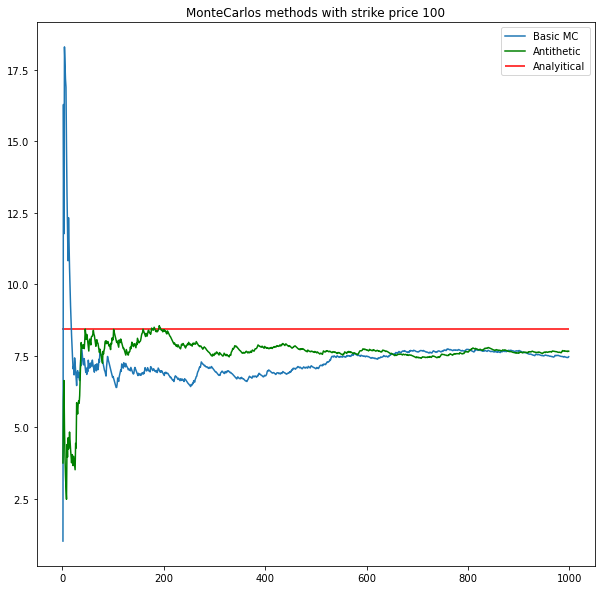

In [135]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.arange(1,1000),Xbar[:1000-1]);
ax.plot(np.arange(1,1000),Xbar2[:1000-1],color='green');

ax.hlines(Abar,xmin=-1,xmax=1000,color='red');
ax.legend(["Basic MC","Antithetic","Analyitical"]);
ax.set_title("MonteCarlos methods with strike price {}".format(K));

In [136]:
K = 200 
MonteCarlos1_antithetic = MCBS_antithetic(S_0,K,r,T,sigma,sample_size);
MonteCarlos1 = MCBS(S_0,K,r,T,sigma,sample_size);

In [137]:
X = np.array(MonteCarlos1)
Xbar = np.cumsum(X)
Xbar = Xbar / np.arange(1,sample_size+1)

In [138]:
X2 = np.array(MonteCarlos1_antithetic)
Xbar2 = np.cumsum(X2)
Xbar2 = Xbar2 / np.arange(1,sample_size+1)

In [139]:
Abar = AnalyticalBS(S_0,K,r,T,sigma)


D1:-3.315736


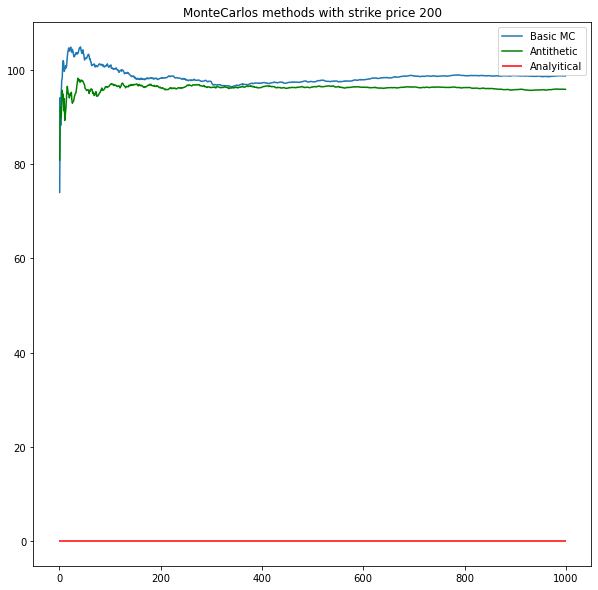

In [140]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(np.arange(1,1000),Xbar[:1000-1]);
ax.plot(np.arange(1,1000),Xbar2[:1000-1],color='green');

ax.hlines(Abar,xmin=-1,xmax=1000,color='red');
ax.legend(["Basic MC","Antithetic","Analyitical"]);
ax.set_title("MonteCarlos methods with strike price {}".format(K));